### Get the HVSR

##### Load in the Time Series

In [48]:
import numpy as np
import math
import os,glob,string
import matplotlib.pyplot as plt
from pylab import *
import intensity_measures as ims

In [49]:
col1,col2,col3= np.loadtxt('EHM010.txt',skiprows=11,unpack=True)  

In [50]:
ud_record = col1
ew_record = col2
ns_record = col3
time_step = 0.01
time_vector= np.arange(len(ns_record)) * time_step

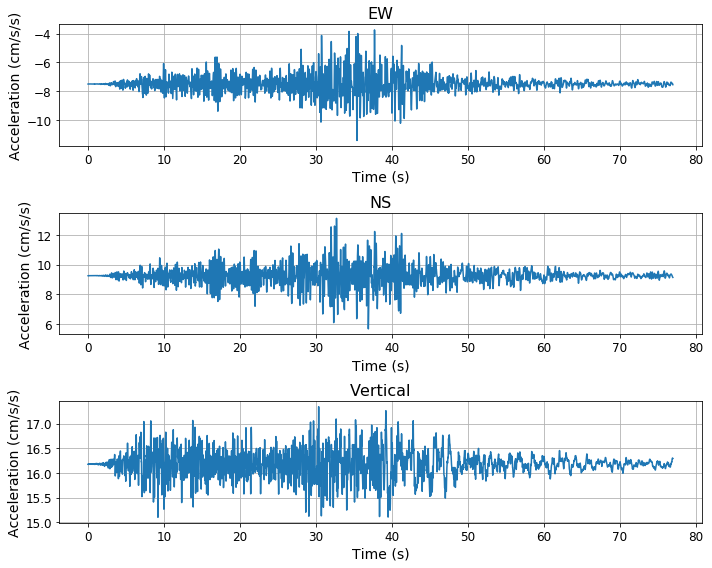

In [57]:
#Plot the records
fig = plt.figure(figsize=(10,8))
fig.set_tight_layout(True)
ax = plt.subplot(311)
ax.plot(time_vector,ew_record)
ax.grid(True)
ax.set_xlabel("Time (s)", fontsize=14)
ax.set_ylabel("Acceleration (cm/s/s)", fontsize=14)
ax.tick_params(labelsize=12)
ax.set_title("EW", fontsize=16)

ax = plt.subplot(312)
ax.plot(time_vector,ns_record)
ax.grid(True)
ax.set_xlabel("Time (s)", fontsize=14)
ax.set_ylabel("Acceleration (cm/s/s)", fontsize=14)
ax.set_title("NS", fontsize=16)
ax.tick_params(labelsize=12)

ax = plt.subplot(313)
ax.plot(time_vector,ud_record)
ax.grid(True)
ax.set_xlabel("Time (s)", fontsize=14)
ax.set_ylabel("Acceleration (cm/s/s)", fontsize=14)
ax.set_title("Vertical", fontsize=16)
ax.tick_params(labelsize=12)
plt.show()

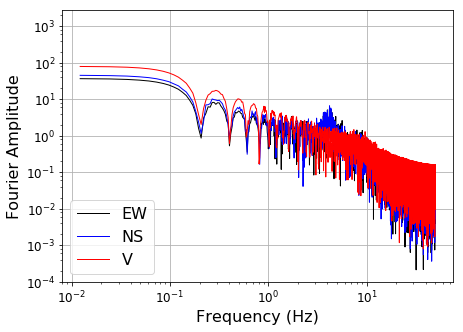

In [58]:
x_freq, x_four = ims.get_fourier_spectrum(ew_record, time_step)
y_freq, y_four = ims.get_fourier_spectrum(ns_record, time_step)
v_freq, v_four = ims.get_fourier_spectrum(ud_record, time_step)
plt.figure(figsize=(7, 5))

plt.loglog(x_freq, x_four, "k-", lw=1.0, label="EW")

plt.loglog(y_freq, y_four, "b-", lw=1.0, label="NS")

plt.loglog(v_freq, v_four, "r-", lw=1.0, label="V")
#plt.xlim(0.05, 200.)
plt.tick_params(labelsize=12)
plt.grid(True)
plt.xlabel("Frequency (Hz)", fontsize=16)
plt.ylabel("Fourier Amplitude", fontsize=16)
plt.legend(loc=3, fontsize=16)
plt.show()


In [59]:
# Setup parameters
params = {"Function": "KonnoOhmachi",
          "bandwidth": 40.0,
          "count": 1.0,
          "normalize": True
          }
# Returns
# 1. Horizontal to Vertical Spectral Ratio
# 2. Frequency
# 3. Maximum H/V
# 4. Period of Maximum H/V
hvsr, freq, max_hv, t_0 = ims.get_hvsr(ew_record, time_step, ns_record, time_step, ud_record, time_step, params)

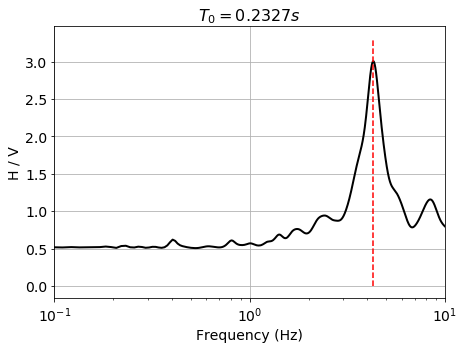

In [60]:
plt.figure(figsize=(7,5))
plt.semilogx(freq, hvsr, 'k-', lw=2.0)
# Show T0
t_0_line = np.array([[t_0, 0.0],
                     [t_0, 1.1 * max_hv]])
plt.semilogx(1.0 / t_0_line[:, 0], t_0_line[:, 1], "r--", lw=1.5)
plt.xlabel("Frequency (Hz)", fontsize=14)
plt.ylabel("H / V", fontsize=14)
plt.tick_params(labelsize=14)
plt.xlim(0.1, 10.0)
plt.grid(True)
plt.title(r"$T_0 = %.4f s$" % t_0, fontsize=16)
plt.show()ls
